In [1]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score, KFold
from numpy import absolute
import pandas as pd

In [2]:
%store -r df

In [3]:
Y = df.Price
X = df.drop(['Price'], axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [5]:
cross_val = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)

In [6]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree',max_depth=5)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [7]:
model1 = xgb.XGBRegressor(base_score=0.5, booster='gblinear',max_depth=5)
model1.fit(X_train, y_train)

[10:35:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depth" } are not used.



XGBRegressor(base_score=0.5, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [8]:
scores = cross_val_score(model, X, Y, cv=cross_val,scoring='r2', n_jobs=-1)
scores1 = cross_val_score(model1, X, Y, cv=cross_val,scoring='r2', n_jobs=-1)

In [9]:
scores

array([0.76352248, 0.72983671, 0.7446755 , 0.7227799 , 0.73430859,
       0.75342187, 0.76775346, 0.73643954, 0.75231923, 0.75999175,
       0.7255397 , 0.73120182, 0.76592625, 0.74722182, 0.73474415,
       0.77215383, 0.76555676, 0.74917559, 0.76633412, 0.72744754,
       0.72396621, 0.75204719, 0.7460699 , 0.76499875, 0.75127083,
       0.76142094, 0.71803666, 0.75315047, 0.75785678, 0.75581219,
       0.7543218 , 0.73950667, 0.74443212, 0.73935451, 0.75975755,
       0.75799467, 0.75102214, 0.72246734, 0.74510059, 0.76562246,
       0.74864696, 0.7519361 , 0.74554635, 0.76107536, 0.75357148,
       0.76595486, 0.76243145, 0.74390034, 0.74626104, 0.70339562])

In [10]:
scores = absolute(scores)
print('Mean r squared: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean r squared: 0.748 (0.015)


In [11]:
scores1 = absolute(scores1)
print('Mean r squared: %.3f (%.3f)' % (scores1.mean(), scores1.std()) )

Mean r squared: 0.373 (0.012)


In [12]:
f_importance=model.get_booster().get_score(importance_type='gain')

In [13]:
importance_df = pd.DataFrame.from_dict(data=f_importance, 
                                       orient='index')

<AxesSubplot:>

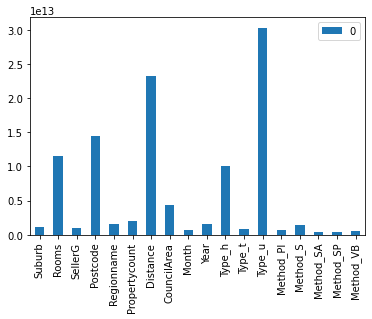

In [14]:
importance_df.plot.bar()